In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

import plotly.express as px
from IPython.display import Image

# import models
from models.Autodecoders_model import Autocoder
from models.Neural_network_model import Model
from models.Graphs import Graphs

In [28]:
raw_data = pd.read_csv("creditcard.csv")

In [29]:
df = raw_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
print("Number null vallues in dataframe: ", df.isnull().sum().sum())

Number null vallues in dataframe:  0


In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Class: 0 - valid transaction, 1 - fraud

In [33]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [34]:
df_class = df["Class"].value_counts().reset_index()
df_class['name'] = df_class['index'].map({0: "Valid", 1: 'Fraud'})
px.bar(df_class, x='name' , y='Class', width=800, height=600, title="Valid and fraud transactions")

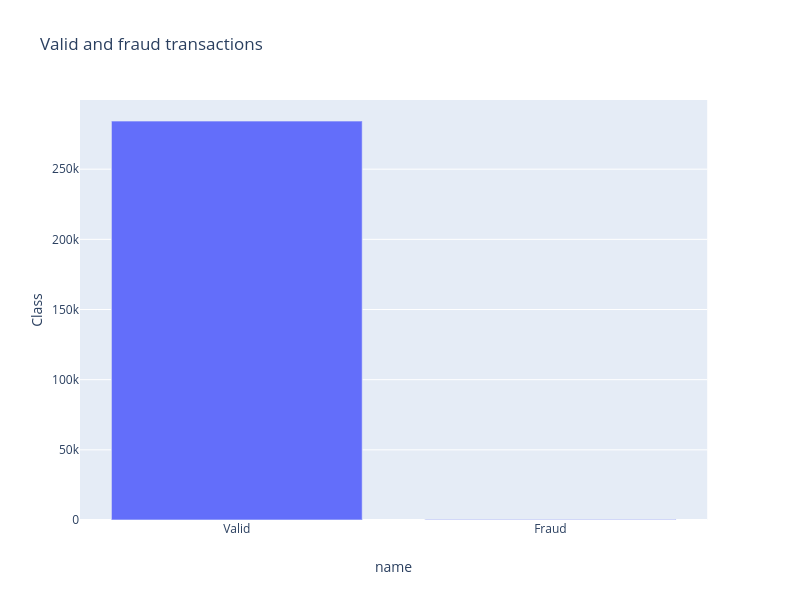

In [35]:
Image(filename='img/bar_plot.png') 

# Preparing the dataset

In [36]:
# Functions are responsible for preparing the data for the model

RANDOM_SEED = 42

def preporcess_data(data: object) -> object:
    data = data.drop("Time", axis=1).copy()
    data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
    return data

def get_train_test_data(processed_data: object) -> list:
    target = processed_data['Class'].copy()
    data = processed_data.drop(['Class'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=RANDOM_SEED)
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
    
    return X_train, X_test, y_train, y_test
    
def get_only_valid_transations(X_train: object) -> object:
    ''' gets only valid transaction '''
    X_train['class'] = y_train
    X_train = X_train[X_train['class'] == 0]
    X_train = X_train.drop(['class'], axis=1)
    
    return X_train

# Autodecoders model

In [37]:
# prepares the dataset
data = preporcess_data(df)
X_train, X_test, y_train, y_test = get_train_test_data(data)
X_train = get_only_valid_transations(X_train)

In [38]:
# creates the model
autocoder_model = Autocoder([25, 2, 2, 25])

# trains the model
autocoder_model.train_model(X_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 29)                870       
_________________________________________________________________
dropout_7 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 29)                870       
_________________________________________________________________
dropout_8 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 25)                750       
_________________________________________________________________
dropout_9 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [39]:
# predicts label 
auto_test_results = autocoder_model.predict(X_test)

# crates a pandas Series object
auto_test_results = pd.Series(auto_test_results)

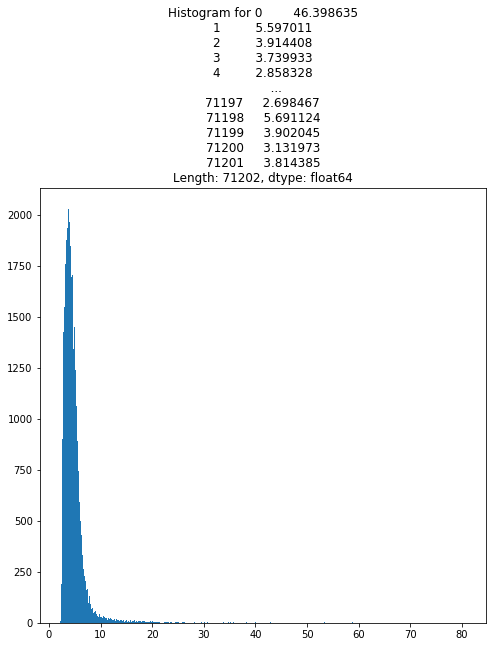

In [40]:
# creates a graph object to draw charts
graphs = Graphs()

# draws a histogram
graphs.plot_hist(auto_test_results)

In [41]:
# finds outliers
auto_test_datasets = X_test.copy()
auto_test_datasets['score'] = auto_test_results.values.reshape(-1, 1)

# data more than 13 are split as fraud
auto_test_datasets['cluster'] = np.where(auto_test_datasets['score']<13, 0, 1)

# counts valid and fraud transatcions
auto_test_datasets['cluster'].value_counts()

0    70180
1     1022
Name: cluster, dtype: int64

In [42]:
# shows mean value for each cluster and column
auto_test_datasets.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.112772,0.022254,0.053124,-0.016857,0.016664,0.000284,0.014439,0.041448,-0.014132,-0.007981,...,-0.003461,0.007432,-0.000878,0.001761,0.001806,0.001292,0.000483,-0.000063,-0.036617,4.499890
1,-7.559607,-1.144129,-3.637262,1.167418,-1.506476,0.236716,-1.383965,-2.492103,0.816633,0.720037,...,0.102074,-0.244078,0.026802,-0.006578,0.143536,-0.080003,0.012325,-0.052009,2.214969,20.426086


In [43]:
result = round(accuracy_score(y_test, auto_test_datasets['cluster']), 4)
print(f"Model accuracy: {result}")

Model accuracy: 0.9863


In [44]:
graphs.plot_confusion_matrix(y_test, auto_test_datasets['cluster'])

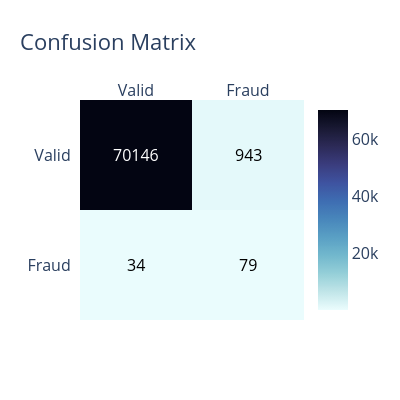

In [45]:
Image(filename='img/cm_a.png') 

In [46]:
print(classification_report(y_test, auto_test_datasets['cluster']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71089
           1       0.08      0.70      0.14       113

    accuracy                           0.99     71202
   macro avg       0.54      0.84      0.57     71202
weighted avg       1.00      0.99      0.99     71202



This model have very good results, but we have less value to recall than precision for Fraud. Also we classified 943 valid as fraud. Additional we classified 34 fraud as valid, we should try to minimize this error and maximize value for recall.

# Neural networks

In [47]:
# prepares the dataset
data = preporcess_data(df)
X_train, X_test, y_train, y_test = get_train_test_data(data)

# creates Neural Networks model
model = Model(X_train, X_test, y_train, y_test)

# defines layers for the model
model.define_model()

In [48]:
# trains the model
model.train_model(save_path='/home/lukas/deep_learning/fraud_detector')

Epoch 1/100
5341/5341 [==============================] - 7s 1ms/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 2/100
5341/5341 [==============================] - 8s 1ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 3/100
5341/5341 [==============================] - 8s 1ms/step - loss: 0.0060 - accuracy: 5.8519e-06 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 4/100
5341/5341 [==============================] - 7s 1ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 5/100
5341/5341 [==============================] - 7s 1ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 6/100
5341/5341 [==============================] - 7s 1ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 7/100
5341/5341 [==============================] - 7s 1ms/step - loss: 0.005

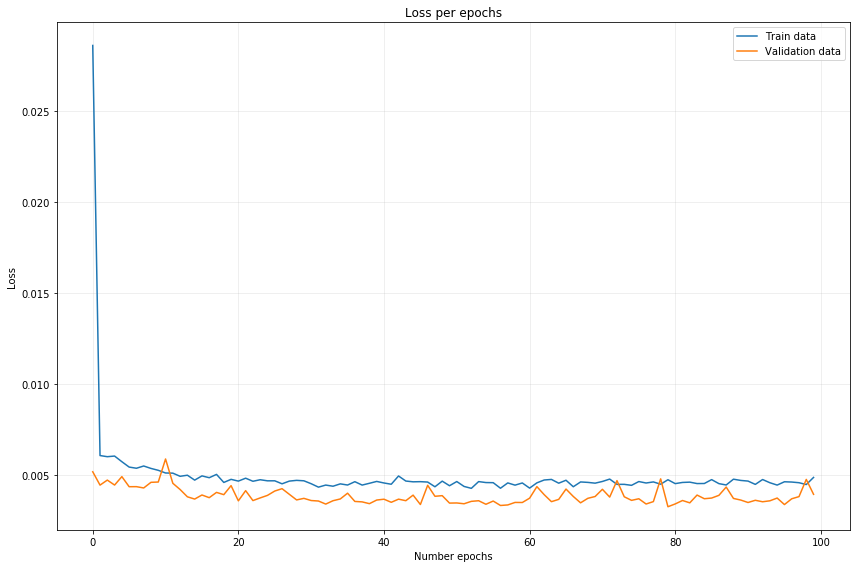

In [49]:
graphs = Graphs()

# gets metrics from history object
metrics = model.get_metrics()
graphs.plot_loss_curves(pd.DataFrame(metrics.history), save_path='/home/lukas/deep_learning/fraud_detector')

In [50]:
# loads the weights for the lowest loss function
model.load_weights('best_model.h5')

# predicts labels
y_pred = model.predict()

# counts a model accuracy
result = round( accuracy_score(y_test, y_pred), 4)
print(f"Model accuracy: {result}")

Model accuracy: 0.9994


In [51]:
graphs.plot_confusion_matrix(y_test, y_pred)

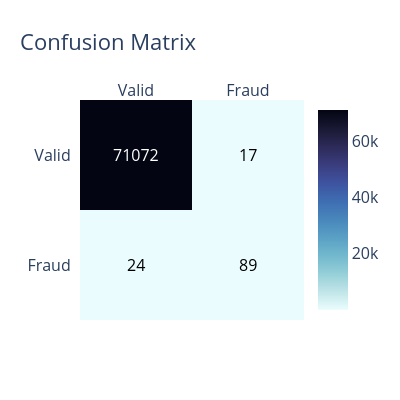

In [53]:
Image("img/cm_n.png")

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.84      0.79      0.81       113

    accuracy                           1.00     71202
   macro avg       0.92      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202



This model is better than the autodecoders model, because we have more value to recall. We classified 24 fraud as valid. We should try to minimize this error. Because the better way is to detect the valid as fraud, because no one will be robbed.